# Imports

In [1]:
from numpy.random import seed
seed(888)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(404)

In [2]:
## system , numpy, time .....
import os
from time import strftime
import numpy as np
import itertools
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

#### tensorflow && kerasss  ################
import tensorflow as tf
# tf.config.threading.set_inter_op_parallelism_threads(6)

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

################ klearn for confusion_matrix 
from sklearn.metrics import confusion_matrix


# Constants

In [3]:
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
NR_CLASSES = 10
image_width= 32
image_height= 32
image_pixels= image_height*image_width
color_channels=3
total_inputs=image_pixels*color_channels

valid_size=10000
xs_size=1000

LOG_DIR='logs/'

# Get the Data

In [4]:
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
# cifar10.load_data()

# Data Preprocessing and scaling from 255.0 to 1.0 and float

In [5]:
x_train, x_test= x_train/255.0 , x_test/255.0

## Reshape data from 4d to 2d

In [6]:
x_train=x_train.reshape(len(x_train), total_inputs)
x_test=x_test.reshape(len(x_test), total_inputs)

In [7]:
print(x_train.shape)

(50000, 3072)


# Create the Model and Compile it

In [8]:
adam_new= tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_ahmad=Sequential([
    Dense(1024,input_dim=total_inputs, activation='relu', name='m_hid1'),
    Dense(512, activation='relu', name='m_hid2'),
    Dense(256, activation='relu', name='m_hid3'),
    Dense(128, activation='relu', name='m_hid4'),
    Dense(64, activation='relu', name='m_hid5'),
    Dense(10, activation='softmax', name='m_output')
])

model_ahmad.compile(
    optimizer=adam_new,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Setup TensorBoard

In [78]:
%load_ext tensorboard

In [79]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths ,profile_batch=100000000)

# Fit and Train

In [84]:
samples_per_batch=2000
nr_epochs=300
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [85]:
%%time
%tensorboard

try:
    model_ahmad.fit(x_train,y_train,batch_size=samples_per_batch,epochs=nr_epochs,callbacks=[get_tensorboard("ahmad_1 2002"),callback],validation_data=(x_train,y_train),
    verbose=0)


except:
        print("Oops!", sys.exc_info()[1], "occured.")
        print("Next entry.")
        print()


Launching TensorBoard...

Successfully created directory
Wall time: 3min 15s


In [86]:
model_ahmad.save("saved_model.h5")

## try to use earlystop

In [87]:
model_ahmad=load_model("saved_model.h5")
test_losses, test_accuracy=model_ahmad.evaluate(x_train,y_train)
print(f'the loss: {test_losses:0.3} and the accuracy is {test_accuracy:0.1%}')

1563/1563 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9886
the loss: 0.0658 and the accuracy is 98.9%


# Confusion Matrix

In [90]:
saved_model=load_model('saved_model.h5')
predictions_all= saved_model.predict_classes(x_train)
conf_matx=confusion_matrix(y_true=y_train, y_pred=predictions_all)
nr_rows=conf_matx.shape[0]
nr_cols=conf_matx.shape[1]

## visualising Confusions

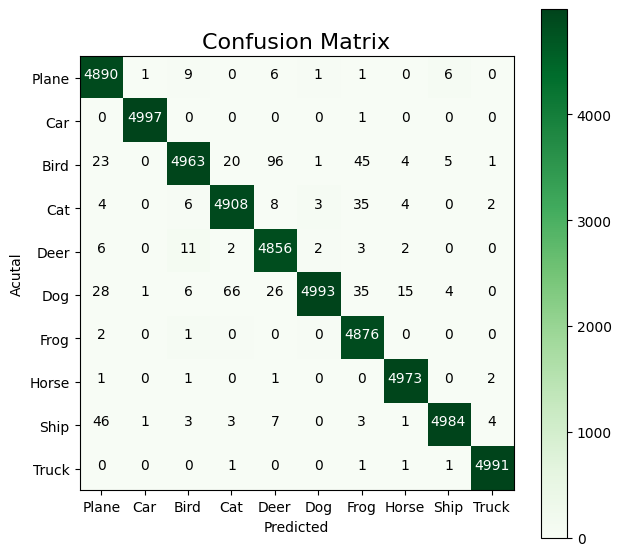

In [91]:
plt.figure(figsize=(7,7), dpi=100)
plt.imshow(conf_matx,cmap=plt.cm.Greens)
plt.colorbar()
plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Acutal")
plt.xlabel("Predicted")
tick_marks=np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
for i, j in itertools.product(range(nr_rows),range(nr_cols)):
    plt.text(i,j , conf_matx[i,j], ha='center', 
    color='white' if conf_matx[i,j] > conf_matx.max()/2 else 'k')


plt.show()

# make Functions to test the model

## Prepare imge to test

In [92]:
def test_image(image_file):
    img=load_img(image_file,target_size=(250,250))
    display(img)
    img=load_img(image_file, target_size=(32,32))
    im_arr=img_to_array(img).reshape(1, total_inputs)
    return im_arr


## Predict and give answer to the test


In [93]:
new_value=np.expand_dims(x_train[0],axis=0);

In [94]:
image_reader=[]
with open('image_pathes.log', 'r') as img_reader:
    for line in img_reader.readlines(): 
        image_reader.append(line.strip())

In [20]:
    # with open('dogslabeladded.npy', 'rb') as fr:
    #     labels = np.load(fr,allow_pickle=True)
    # with open('dogsadded.npy', 'rb') as f:
    #     train_data=np.load(f,allow_pickle=True)

In [21]:
# train_data.shape

In [95]:
def train_images():
    try:
        saved_model=load_model('saved_model.h5')
        saved_model.fit(x_train,y_train,epochs=150,batch_size=2000,verbose=0,callbacks=[callback,get_tensorboard("tarin images")],validation_data=(x_test,y_test))

    except:
            print("Oops!", sys.exc_info()[1], "occured.")
            print("Next entry.")
            print()
    saved_model.save('saved_model.h5')

In [96]:
%%time
train_images()


Successfully created directory
Wall time: 10.5 s


In [97]:
# saved_model=load_model('saved_model.h5')
test_losses, test_accuracy=saved_model.evaluate(x_train,y_train)
print(f'the loss: {test_losses:0.3} and the accuracy is {test_accuracy:0.1%}')

1563/1563 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9886
the loss: 0.0658 and the accuracy is 98.9%


In [25]:
# n_array_test=x_train
# print(n_array_test.shape)
# print(new_value.shape)
# n_array_test=np.append(n_array_test,new_value,axis=0)
# print(n_array_test[-1])
# print(y_train.shape)
# y_train_new=np.append(y_train,[2],axis=None)
# print(y_train_new[-1])
# y_train_new=np.expand_dims(y_train_new,axis=1)
# print(y_train_new.shape)

In [69]:
def train_new(image_file,class_to_add):
    img_t=load_img(image_file, target_size=(32,32))
    im_arr_t=img_to_array(img_t).reshape(1, total_inputs)
    # print(im_arr_t)
    """ 
    * Adding the new images to the train Array 
    """
    x_train_new=np.append(x_train,im_arr_t,axis=0)
    y_train_new=np.append(y_train,class_to_add)
    y_train_new=np.expand_dims(y_train_new,axis=1)
    # print(x_train_new[-1],y_train_new[-1])
    ## search for trainnig data labels that match class to add
    for x in range(len(y_test)):
        if y_test[x]==class_to_add:
            print(x)
            new_label=x
            break
    print(f'the image to enter is a {LABEL_NAMES[class_to_add]} the original location is found: {y_test[new_label]}')

    try:
        saved_model=load_model('saved_model.h5')
        saved_model.fit(x_train_new,y_train_new,epochs=150,batch_size=2000,verbose=0,callbacks=[callback],validation_data=(x_test,y_test))

    except:
            print("Oops!", sys.exc_info()[1], "occured.")
            print("Next entry.")
            print()
    saved_model.save('saved_model.h5')

In [70]:
def predict_test(image_file):
    im_to_test=test_image(image_file)
    saved_model=load_model('saved_model.h5')
    class_test=saved_model.predict_classes(im_to_test)[0]
    result=LABEL_NAMES[class_test]
    print(f'I think that your image is a {result}')

## Train model with new images

In [98]:
%%time
train_new('images/01 Umbrella.jpg',4)

22
the image to enter is a Deer the original location is found: [4]
Wall time: 17 s


In [99]:
saved_model=load_model('saved_model.h5')
test_losses, test_accuracy=saved_model.evaluate(x_train,y_train)
print(f'the loss: {test_losses:0.3} and the accuracy is {test_accuracy:0.1%}')

1563/1563 [==============================] - 3s 2ms/step - loss: 1.6022 - accuracy: 0.4195
the loss: 1.6 and the accuracy is 41.9%


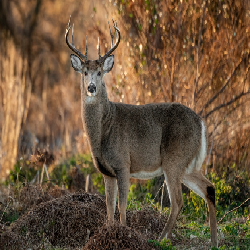

I think that your image is a Horse


In [101]:
predict_test('images/deer1.jpg')

In [102]:
y_test.shape

(10000, 1)

In [30]:
for x in range(len(y_test)):
    if y_test[x]==2:
        print(x)
        break

        

25


In [108]:
# %tensorboard  --logdir logs/